In [59]:
import numpy as np
import pandas as pd
from sklearn.linear_model import PassiveAggressiveClassifier,RidgeClassifier,SGDClassifier
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

In [64]:
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [52]:
df = pd.read_csv("mushrooms.csv")
df['class'] = df['class'].map({"e": "edible", "p": "poisonous"})
df.iloc[:5,:8]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing
0,poisonous,x,s,n,t,p,f,c
1,edible,x,s,y,t,a,f,c
2,edible,b,s,w,t,l,f,c
3,poisonous,x,y,w,t,p,f,c
4,edible,x,s,g,f,n,f,w


In [53]:
X = df.drop("class", axis = 1).copy()
y = df['class'].copy()

label_encoder_data = X.copy()
label_encoder = LabelEncoder()
for col in X.columns:
    label_encoder_data[col] = label_encoder.fit_transform(label_encoder_data[col])
    
X = label_encoder_data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
X_train.shape


(7311, 22)

In [56]:
X_test.shape

(813, 22)

In [57]:
# Create a dictionary with the model which will be tested
models = {
    "GaussianNB":{"model":GaussianNB()},
    "PassiveAggressiveClassifier":{"model":PassiveAggressiveClassifier() },
    "RidgeClassifier":{"model":RidgeClassifier() },
    "SGDClassifier":{"model":SGDClassifier() },
    "SVC":{"model":SVC() },
    "RandomForestClassifier":{"model":RandomForestClassifier() },
    "GradientBoostingClassifier":{"model":GradientBoostingClassifier() },
    "AdaBoostClassifier":{"model":AdaBoostClassifier() }
}

# Use the 10-fold cross validation for each model
# to get the mean validation accuracy and the mean training time
for name, m in models.items():
    # Cross validation of the model
    model = m['model']
    result = cross_validate(model, X_train,y_train,cv = 10)
    
    # Mean accuracy and mean training time
    mean_val_accuracy = round( sum(result['test_score']) / len(result['test_score']), 4)
    mean_fit_time = round( sum(result['fit_time']) / len(result['fit_time']), 4)
    
    # Add the result to the dictionary witht he models
    m['val_accuracy'] = mean_val_accuracy
    m['Training time (sec)'] = mean_fit_time
    
    # Display the result
    print(f"{name:27} mean accuracy using 10-fold cross validation: {mean_val_accuracy*100:.2f}% - mean training time {mean_fit_time} sec")

GaussianNB                  mean accuracy using 10-fold cross validation: 92.15% - mean training time 0.0099 sec
PassiveAggressiveClassifier mean accuracy using 10-fold cross validation: 91.86% - mean training time 0.0203 sec
RidgeClassifier             mean accuracy using 10-fold cross validation: 94.52% - mean training time 0.0203 sec
SGDClassifier               mean accuracy using 10-fold cross validation: 93.78% - mean training time 0.0577 sec
SVC                         mean accuracy using 10-fold cross validation: 98.96% - mean training time 0.3071 sec
RandomForestClassifier      mean accuracy using 10-fold cross validation: 100.00% - mean training time 0.2477 sec
GradientBoostingClassifier  mean accuracy using 10-fold cross validation: 100.00% - mean training time 0.5489 sec
AdaBoostClassifier          mean accuracy using 10-fold cross validation: 100.00% - mean training time 0.4178 sec


In [58]:
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    lst = [name, v['val_accuracy'],v['Training time (sec)']]
    models_result.append(lst)

df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','Training time (sec)'])
df_results.sort_values(by='val_accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,val_accuracy,Training time (sec)
0,RandomForestClassifier,1.0000,0.2477
1,GradientBoostingClassifier,1.0000,0.5489
2,AdaBoostClassifier,1.0000,0.4178
3,SVC,0.9896,0.3071
4,RidgeClassifier,0.9452,0.0203
5,SGDClassifier,0.9378,0.0577
6,GaussianNB,0.9215,0.0099
7,PassiveAggressiveClassifier,0.9186,0.0203


## Best Model: RandomForestClassifier with 100.0% accuracy on the test set

## Trained in: 0.2477 sec

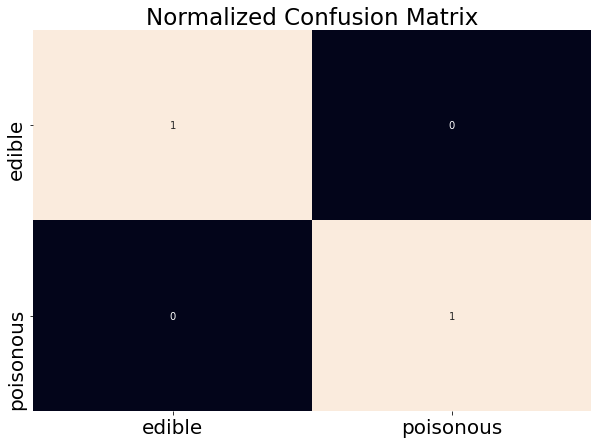

In [65]:
# Get the model with the highest mean validation accuracy
best_model = df_results.iloc[0]

# Fit the model
model = models[best_model[0]]['model']
model.fit(X_train,y_train)

# Predict the labels with the data set
pred = model.predict(X_test)

# Display the results
printmd(f'## Best Model: {best_model[0]} with {best_model[1]*100}% accuracy on the test set')
printmd(f'## Trained in: {best_model[2]} sec')

# Display a confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()